installing block

In [ ]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install opencv-python-headless
!pip install opencv-contrib-python-headless
!apt-get install p7zip-full

importing block

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os
from google.colab import drive
from google.colab.patches import cv2_imshow
from google.colab import files

**This field to help upload images or dataset to be used**

make file named images in directory

In [3]:
if not os.path.exists("image"):
    os.makedirs("image")

download images from web by url to directory

In [ ]:
# List of image URLs
image_urls = [
    "https://media.istockphoto.com/photos/generic-red-suv-on-a-white-background-side-view-picture-id1157655660?b=1&k=20&m=1157655660&s=612x612&w=0&h=ekNZlV17a3wd_yN9PhHXtIabO_zFo4qipCy2AZRpWUI=",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQyPdaCgH6L0smL-JvbLRDEvYKW6Yhvq3eagUHVpT2&s",
    # Add more URLs as needed
]

# Download images and save them in the "image" directory
for i, url in enumerate(image_urls):
    file_name = f"image_{i+1}.jpg"
    file_path = os.path.join("image", file_name)
    
    urllib.request.urlretrieve(url, file_path)
    print(f"Downloaded {file_name} from {url}")

download images from device but instead of putting it in "images" it create new file for them in form "photos_file_number"

In [33]:
# Function to create a new directory with an incremented number in the name
def create_new_directory(prefix="photos_file_"):
    i = 0
    while True:
        dir_name = f"{prefix}{i}"
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
            return dir_name
        i += 1

# Create a new directory with an incremented number in the name
new_directory = create_new_directory()

# Upload images from the local device
uploaded = files.upload()

# Move uploaded files to the new directory
for file_name in uploaded.keys():
    file_path = os.path.join(new_directory, file_name)
    os.rename(file_name, file_path)
    print(f"Moved {file_name} to {file_path}")


temporary download image from device for this session use (will go afterward)

In [32]:
if not os.path.exists("image"):
    os.makedirs("image")

uploaded = files.upload()

# Move uploaded files to the "image" directory
for file_name in uploaded.keys():
    file_path = os.path.join("image", file_name)
    os.rename(file_name, file_path)
    print(f"Moved {file_name} to {file_path}")


Saving 1.jpg to 1.jpg
Saving 2.jpeg to 2.jpeg
Saving 5.webp to 5.webp
Saving 10.avif to 10.avif
Saving 11.jpg to 11.jpg
Saving 12.jpeg to 12.jpeg
Saving 13.jpeg to 13.jpeg
Saving 14.jpeg to 14.jpeg
Moved 1.jpg to image/1.jpg
Moved 2.jpeg to image/2.jpeg
Moved 5.webp to image/5.webp
Moved 10.avif to image/10.avif
Moved 11.jpg to image/11.jpg
Moved 12.jpeg to image/12.jpeg
Moved 13.jpeg to image/13.jpeg
Moved 14.jpeg to image/14.jpeg


**field end**

copy path of this directory

In [34]:
# Get current working directory
cwd = os.getcwd()

**Step 1 : covert image to grey scale**

image_directory = "image"

Call the function with only the directory to process all images
convert_image_to_grayscale(image_directory)

Call the function with directory and index to process a specific image (e.g. index 1, 2, 3, ...)
convert_image_to_grayscale(image_directory, index=1)

In [35]:
def convert_image_to_grayscale(image_directory, index=None):
    if index is None:
        for file_name in os.listdir(image_directory):
            file_path = os.path.join(image_directory, file_name)
            print(f"Processing {file_name}:")
            process_image(file_path)
    else:
        file_name = f"image_{index}.jpg"
        file_path = os.path.join(image_directory, file_name)
        print(f"Processing {file_name}:")
        process_image(file_path)

def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Display the grayscale image
    cv2_imshow(gray_image)

    return gray_image


after coverting to grey scale this version safe the result in another file

In [36]:
def convert_image_to_grayscale(image_directory, output_directory, index=None):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    if index is None:
        for file_name in os.listdir(image_directory):
            file_path = os.path.join(image_directory, file_name)
            print(f"Processing {file_name}:")
            process_image(file_path, output_directory)
    else:
        file_name = f"image_{index}.jpg"
        file_path = os.path.join(image_directory, file_name)
        print(f"Processing {file_name}:")
        process_image(file_path, output_directory)

def process_image(image_path, output_directory):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Display the grayscale image
    cv2_imshow(gray_image)

    # Save the grayscale image to the output directory
    file_name = os.path.basename(image_path)
    output_path = os.path.join(output_directory, file_name)
    cv2.imwrite(output_path, gray_image)

Processing 14.jpeg:


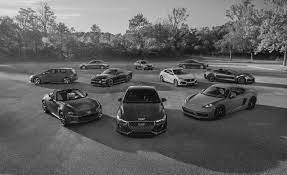

Processing 5.webp:


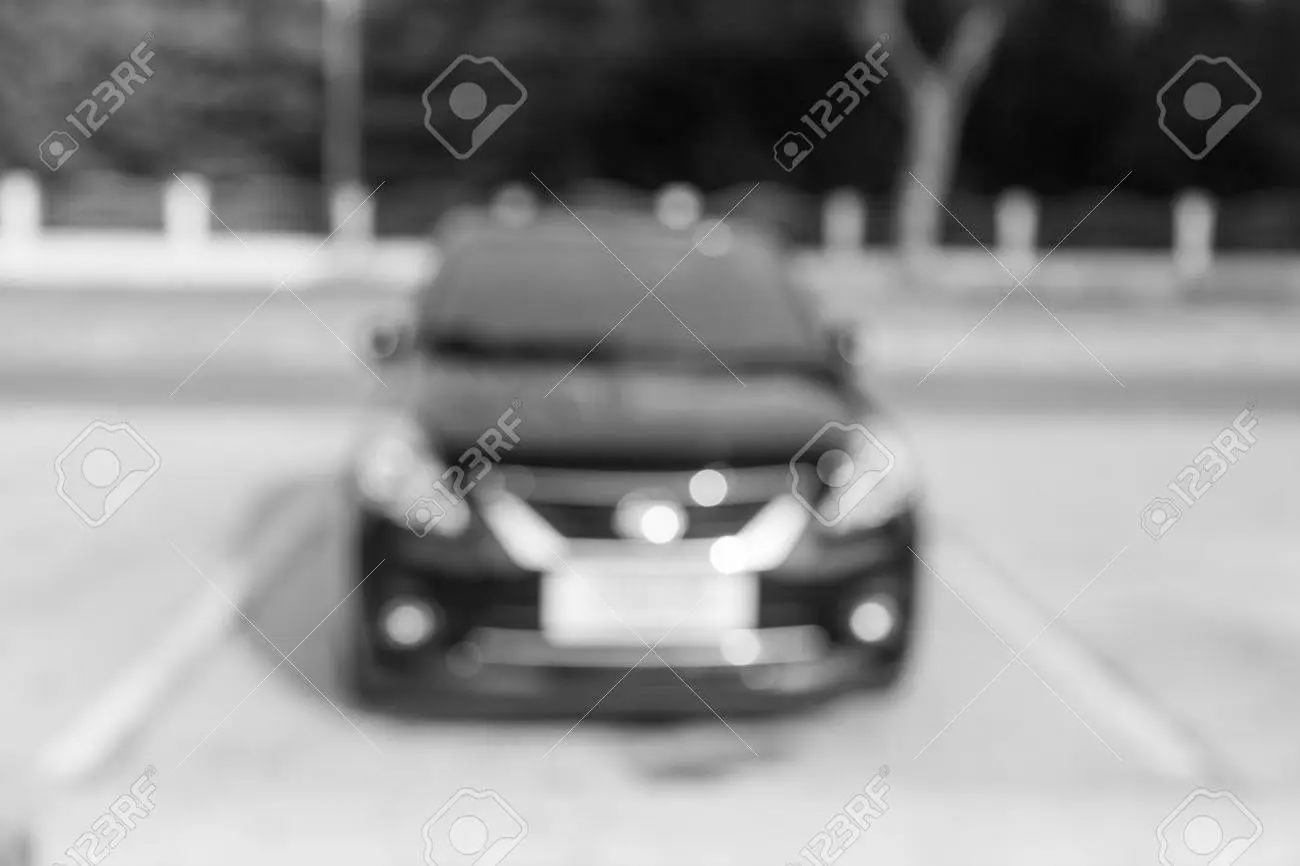

Processing 2.jpeg:


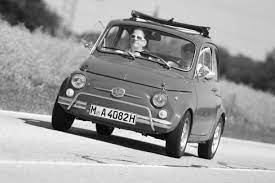

Processing 11.jpg:


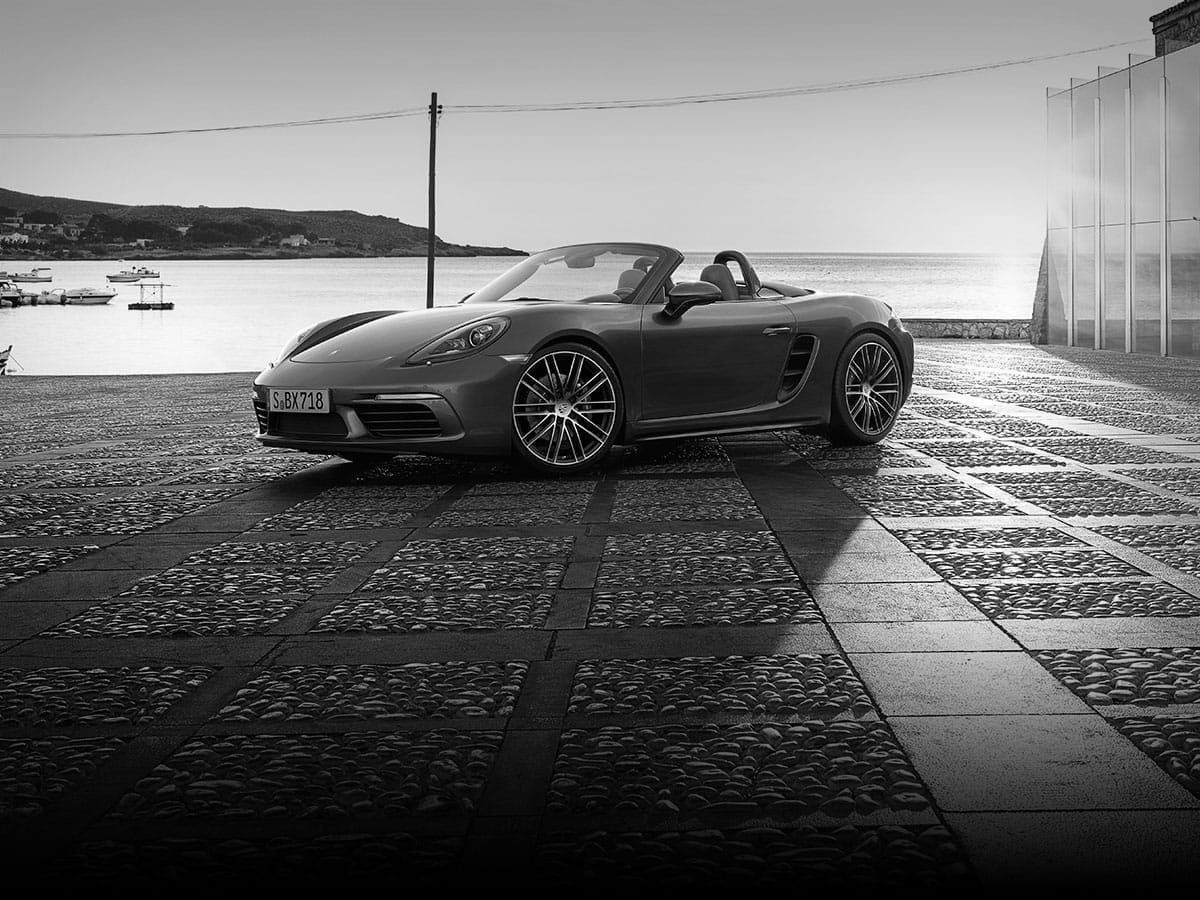

Processing image_1.jpg:


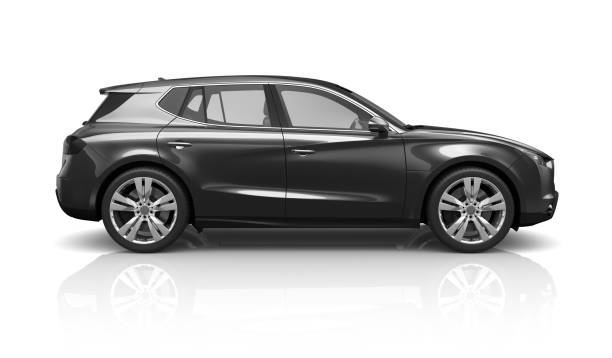

Processing 10.avif:


error: ignored

In [37]:
image_directory = "image"
output_directory = "grey_image"
convert_image_to_grayscale(image_directory, output_directory)

display image and it converted version

In [38]:


def display_image_pairs(image_directory, grey_image_directory, index=None):
    if index is None:
        for file_name in os.listdir(image_directory):
            file_path = os.path.join(image_directory, file_name)
            grey_file_path = os.path.join(grey_image_directory, file_name)
            print(f"Displaying {file_name}:")
            show_image_pair(file_path, grey_file_path)
    else:
        file_name = f"image_{index}.jpg"
        file_path = os.path.join(image_directory, file_name)
        grey_file_path = os.path.join(grey_image_directory, file_name)
        print(f"Displaying {file_name}:")
        show_image_pair(file_path, grey_file_path)

def show_image_pair(image_path, grey_image_path):
    # Read the original image and its grayscale version
    image = cv2.imread(image_path)
    grey_image = cv2.imread(grey_image_path, cv2.IMREAD_GRAYSCALE)

    # Display the original image
    print("Original Image:")
    cv2_imshow(image)

    # Display the grayscale image
    print("Grayscale Image:")
    cv2_imshow(grey_image)


In [ ]:
image_directory = "image"
grey_image_directory = "grey_image"
display_image_pairs(image_directory, grey_image_directory)

show photo with it histogram

In [39]:
def display_histogram(image_directory, index=None):
    if index is None:
        for file_name in os.listdir(image_directory):
            file_path = os.path.join(image_directory, file_name)
            print(f"Displaying histogram for {file_name}:")
            show_histogram(file_path)
    else:
        file_name = f"image_{index}.jpg"
        file_path = os.path.join(image_directory, file_name)
        print(f"Displaying histogram for {file_name}:")
        show_histogram(file_path)

def show_histogram(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Display the image
    print("Image:")
    cv2_imshow(image)

    # Calculate the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.figure()
    plt.title("Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(histogram)
    plt.xlim([0, 256])
    plt.show()

In [ ]:
image_directory = "grey_image"
display_histogram(image_directory)

**Step 2  : Apply Gaussian blur to the image to reduce noise.**

create "gus_image" file fast

In [14]:
if not os.path.exists("gus_image"):
     os.makedirs("gus_image")

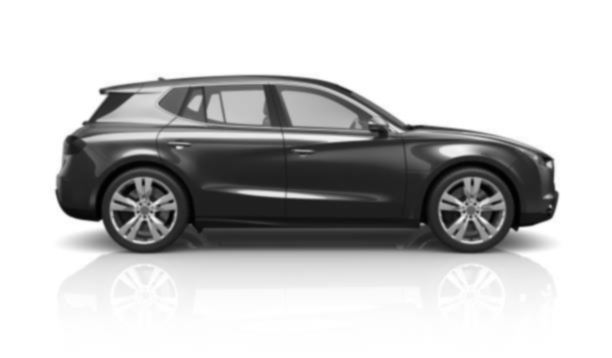

In [40]:
from google.colab.patches import cv2_imshow

def apply_gaussian_blur(image_filename, k_size, sigma):
    # Create the output directory if it doesn't exist
    if not os.path.exists("grey_image"):
        os.makedirs("grey_image")

    # Read the image from the "grey_image" directory
    image_path = os.path.join("grey_image", image_filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Image not found or could not be read at '{image_path}'.")
        return

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (k_size, k_size), sigma)
    cv2_imshow(blurred_image)

    # Save the result image in the "gus_image" directory
    output_path = os.path.join("gus_image", image_filename)
    cv2.imwrite(output_path, blurred_image)

# Example usage:
image_filename = "1.jpg"
k_size = 5
sigma = 0.9
apply_gaussian_blur(image_filename, k_size, sigma)


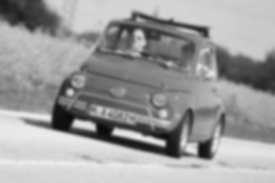

In [43]:
# Example usage:
image_filename = "/content/grey_image/2.jpeg"
k_size = 5
sigma = 0.7
apply_gaussian_blur(image_filename, k_size, sigma)

**Step 3 : Use a thresholding method (e.g., adaptive thresholding) to create a binary image.**

In [44]:
from google.colab.patches import cv2_imshow

def apply_threshold(image, method, image_filename, *args):
    if method == 'binary':
        threshold_value, max_value = args
        _, thresholded_image = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)
    elif method == 'otsu':
        _, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    elif method == 'adaptive':
        max_value, adaptive_method, block_size, c = args
        thresholded_image = cv2.adaptiveThreshold(image, max_value, adaptive_method, cv2.THRESH_BINARY, block_size, c)
    else:
        raise ValueError("Invalid thresholding method")

        # Choose the output directory based on the method
    if method == 'binary':
        output_dir = 'binary_image'
    elif method == 'otsu':
        output_dir = 'otsu_image'
    elif method == 'adaptive':
        output_dir = 'adaptive_image'
    else:
        raise ValueError("Invalid thresholding method")

    cv2_imshow(thresholded_image)

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save the result image in the output directory
    output_path = os.path.join(output_dir, os.path.basename(image_filename))
    print(f"Saving thresholded image to: {output_path}")
    cv2.imwrite(output_path, thresholded_image)

    return thresholded_image


    # Binary thresholding
    #threshold_value = 127
    #max_value = 255
    #binary_thresholded_image = apply_threshold(blurred_image, 'binary',image_filename, threshold_value, max_value)

    # Otsu's thresholding
    #otsu_thresholded_image = apply_threshold(blurred_image, 'otsu',image_filename)
    # Apply adaptive thresholding
    max_value = 255
    adaptive_method = cv2.ADAPTIVE_THRESH_MEAN_C
    block_size = 11
    c = 2
    adaptive_thresholded_image = apply_threshold(blurred_image, 'adaptive',image_filename, max_value, adaptive_method, block_size, c)


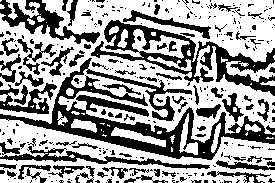

Saving thresholded image to: adaptive_image/2.jpeg


In [45]:
# Read the blurred image from the "gus_image" directory
blurred_image_path = os.path.join("gus_image", image_filename)
blurred_image = cv2.imread(blurred_image_path, cv2.IMREAD_GRAYSCALE)

if blurred_image is None:
    print(f"Error: Blurred image not found or could not be read at '{blurred_image_path}'.")
else:
    # Apply adaptive thresholding
    max_value = 255
    # cv2.ADAPTIVE_THRESH_GAUSSIAN_C OR cv2.ADAPTIVE_THRESH_MEAN_C
    adaptive_method = cv2.ADAPTIVE_THRESH_MEAN_C
    block_size = 7
    c = 1
    adaptive_thresholded_image = apply_threshold(blurred_image, 'adaptive', image_filename, max_value, adaptive_method, block_size, c)


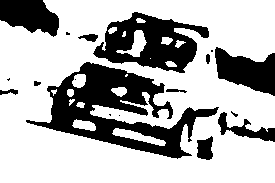

Saving thresholded image to: binary_image/2.jpeg


In [46]:
# Read the blurred image from the "gus_image" directory
blurred_image_path = os.path.join("gus_image", image_filename)
blurred_image = cv2.imread(blurred_image_path, cv2.IMREAD_GRAYSCALE)

if blurred_image is None:
    print(f"Error: Blurred image not found or could not be read at '{blurred_image_path}'.")
else:
    # Binary thresholding
    threshold_value = 127
    max_value = 255
    binary_thresholded_image = apply_threshold(blurred_image, 'binary',image_filename, threshold_value, max_value)

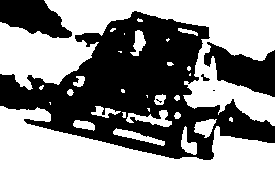

Saving thresholded image to: otsu_image/2.jpeg


In [47]:
# Read the blurred image from the "gus_image" directory
blurred_image_path = os.path.join("gus_image", image_filename)
blurred_image = cv2.imread(blurred_image_path, cv2.IMREAD_GRAYSCALE)

if blurred_image is None:
    print(f"Error: Blurred image not found or could not be read at '{blurred_image_path}'.")
else:
    # Otsu's thresholding
    otsu_thresholded_image = apply_threshold(blurred_image, 'otsu',image_filename)

# New Section

# New Section

** **Step** **4** **:** **Morphological** **operations** **

The binary image obtained from the adaptive thresholding is further processed using morphological operations such as erosion and dilation to remove small noise and fill gaps between connected components.

In [48]:
def apply_closing(image_filename, kernel_size, iterations):
    # Create the output directory if it doesn't exist
    if not os.path.exists("closing_image"):
        os.makedirs("closing_image")

    # Read the image from the specified directory
    image_path = os.path.join("adaptive_image", image_filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Image not found or could not be read at '{image_path}'.")
        return

    # Create the kernel for the closing operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

    # Apply the closing operation
    closing_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    # Save the result image in the "closing_image" directory
    output_path = os.path.join("closing_image", image_filename)
    cv2.imwrite(output_path, closing_image)

    cv2_imshow(closing_image)


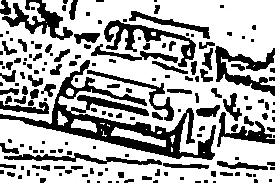

In [49]:
image_filename = "2.jpeg"
kernel_size = 3
iterations = 1
apply_closing(image_filename, kernel_size, iterations)

In [50]:
import cv2
import os

def apply_opening(image_filename, kernel_size, iterations):
    # Create the output directory if it doesn't exist
    if not os.path.exists("opening_image"):
        os.makedirs("opening_image")

    # Read the image from the specified directory
    image_path = os.path.join("adaptive_image", image_filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Image not found or could not be read at '{image_path}'.")
        return

    # Create the kernel for the opening operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

    # Apply the opening operation
    opening_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=iterations)

    # Save the result image in the "opening_image" directory
    output_path = os.path.join("opening_image", image_filename)
    cv2.imwrite(output_path, opening_image)

    cv2_imshow(opening_image)


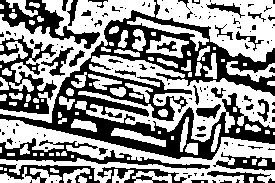

In [51]:
image_filename = "2.jpeg"
kernel_size = 3
iterations = 1
apply_opening(image_filename, kernel_size, iterations)

**Step 5 Contour analysis: Filter contours based on size, aspect ratio, and other properties to identify potential car candidates.**

Contour analysis: contours are extracted from the processed binary image, and their features, such as aspect ratio, solidity, and orientation, are analyzed to identify and locate vehicles in the image.

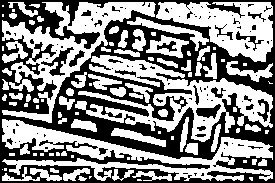

In [52]:
# Read the image from the "opening_image" directory
image_filename = "2.jpeg"
image_path = os.path.join("opening_image", image_filename)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Image not found or could not be read at '{image_path}'.")
else:
    # Find contours in the image
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process and analyze the contours
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        bounding_box = cv2.boundingRect(contour)
        moments = cv2.moments(contour)
        # Further analysis or processing based on the features

# Draw contours on the original image
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

# Create the "contours_image" directory if it doesn't exist
output_dir = "contours_image"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the result image in the "contours_image" directory
output_path = os.path.join(output_dir, image_filename)
cv2.imwrite(output_path, image_with_contours)

# Display the image with contours
cv2_imshow(image_with_contours)


**Step 6 : Draw bounding boxes around the detected car candidates.**

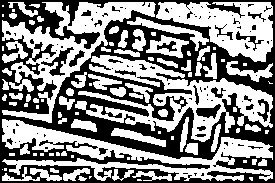

In [53]:
# Assuming 'contours' is the list of contours you've found previously
bounding_boxes = []

for contour in contours:
    # Get the bounding box coordinates (x, y, width, height) for each contour
    x, y, w, h = cv2.boundingRect(contour)

    # Draw the bounding box on the original image
    image_with_boxes = cv2.rectangle(image_with_contours, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save the bounding box information
    bounding_boxes.append((x, y, w, h))

# Display the image with bounding boxes
cv2_imshow(image_with_boxes)


** **Here a 1 function approuch to see fast result** **

process_image function to help with repeated functions while i always check if index is none or there is a number (in defult here it work on the histogram funciton but it can be used on another one) 

In [54]:
def process_images(image_directory, process_function, index=None):
    if index is None:
        for file_name in os.listdir(image_directory):
            file_path = os.path.join(image_directory, file_name)
            print(f"Processing {file_name}:")
            process_function(file_path)
    else:
        file_name = f"image_{index}.jpg"
        file_path = os.path.join(image_directory, file_name)
        print(f"Processing {file_name}:")
        process_function(file_path)

def show_histogram(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Display the image
    print("Image:")
    cv2_imshow(image)

    # Calculate the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.figure()
    plt.title("Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(histogram)
    plt.xlim([0, 256])
    plt.show()

image_directory = "image"

# Call the process_images function with the show_histogram function to display histograms for all images
process_images(image_directory, show_histogram)

# Call the process_images function with the show_histogram function and an index to display a histogram for a specific image (e.g. index 1, 2, 3, ...)
process_images(image_directory, show_histogram, index=1)


Output hidden; open in https://colab.research.google.com to view.

In [55]:
from typing import List, Tuple

def non_max_suppression(boxes: List[Tuple[int, int, int, int]], overlapThresh: float):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # if the bounding boxes are integers, convert them to floats -- this
    # is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    # keep looping while some indexes still remain in the indexes list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the index value
        # to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of the bounding
        # box and the smallest (x, y) coordinates for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have overlap greater
        # than the provided overlap threshold
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))

    # return only the bounding boxes that were picked
    return boxes[pick].astype("int")


In [56]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


def get_file_paths(image_directory, index=None):
    if index is None:
        file_paths = [os.path.join(image_directory, file_name) for file_name in os.listdir(image_directory)]
    else:
        file_name = f"image_{index}.jpg"
        file_path = os.path.join(image_directory, file_name)
        file_paths = [file_path]

    return file_paths

def process_images(image_directory, process_function, target_width, target_height, index=None):
    file_paths = get_file_paths(image_directory, index)
    # Initialize total count
    total_car_count = 0
    for file_path in file_paths:
        print(f"Processing {os.path.basename(file_path)}:")
        total_car_count += process_function(file_path, target_width, target_height)
    print(f"Total number of cars detected: {total_car_count}")

def detect_cars(image_path, target_width, target_height):
    # Initialize a counter for the number of cars detected
    car_count = 0
    bounding_boxes = []

    # Read the image
    image = cv2.imread(image_path)

    # Resize the image to the target width and height
    image = cv2.resize(image, (target_width, target_height))

    # Load the pre-trained cascade classifier for car detection
    cascade_path = "C:\opencv\haarcascades\cars.xml"
    car_cascade = cv2.CascadeClassifier(cascade_path)

    # Convert the image to grayscale
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(grey_image, (7, 7), 0)

    # Apply adaptive thresholding
    binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours and store bounding boxes around potential cars
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h
        area = cv2.contourArea(contour)

        min_area = 1000
        max_area = 10000
        min_aspect_ratio = 1.1
        max_aspect_ratio = 4.0

        if min_area < area < max_area and min_aspect_ratio < aspect_ratio < max_aspect_ratio:
            bounding_boxes.append((x, y, x + w, y + h))  # store the bounding box

    # Apply non-max suppression to the bounding boxes
    pick = non_max_suppression(np.array(bounding_boxes), 0.2)

    # Draw the final bounding boxes and count cars
    for (startX, startY, endX, endY) in pick:
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        car_count += 1

    # Display the resulting image
    cv2_imshow(image)

    return car_count


image_directory = "image"

# Call the detect_cars function with a specific image (e.g., index 1, 2, 3, ...)
image_directory = "image"
target_width = 800
target_height = 600

# Call the detect_cars function with a specific image (e.g., index 1, 2, 3, ...) and resize the images
process_images(image_directory, detect_cars, target_width, target_height)

Output hidden; open in https://colab.research.google.com to view.

Processing 5.webp:


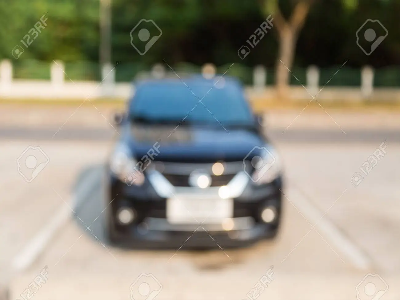

Processing 2.jpeg:


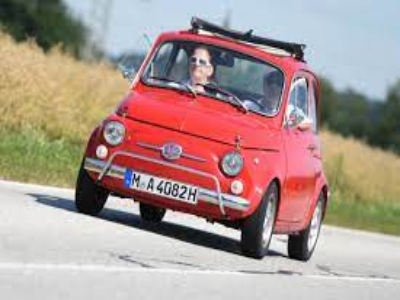

Processing image_1.jpg:


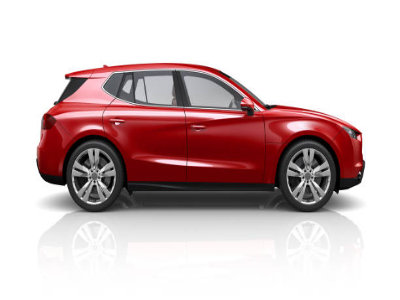

Processing 1.jpg:


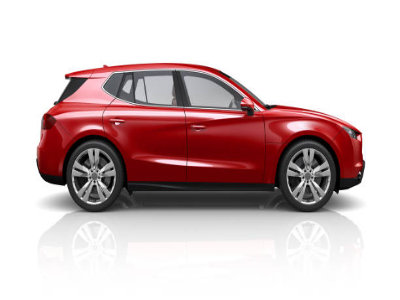

Processing image_2.jpg:


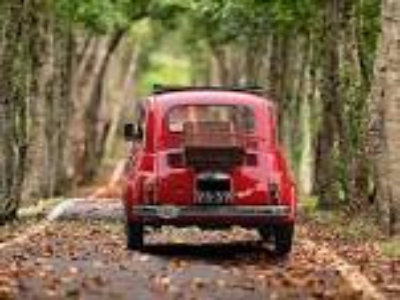

Total number of cars detected: 0


In [64]:
image_directory = "image"
target_width = 400
target_height = 300

# Call the detect_cars function with a specific image (e.g., index 1, 2, 3, ...) and resize the images
process_images(image_directory, detect_cars, target_width, target_height)


Processing 2.jpeg:


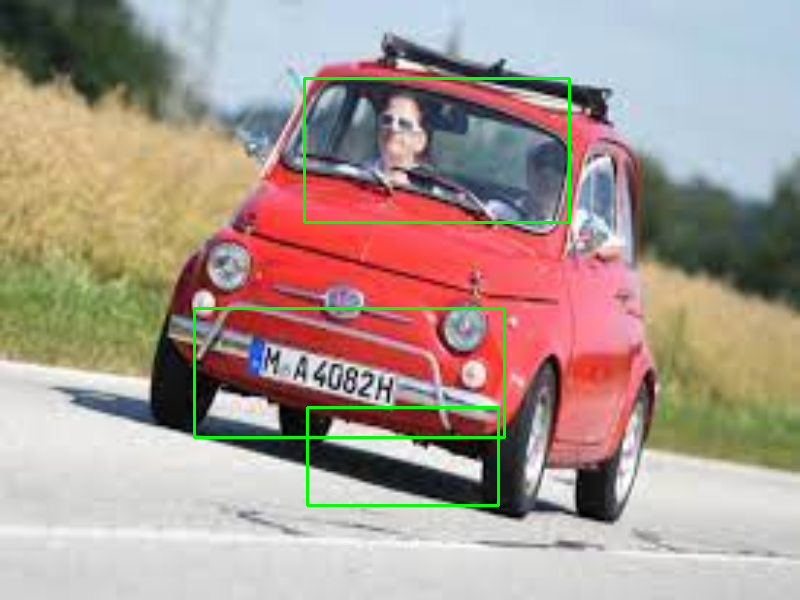

Processing image_2.jpg:


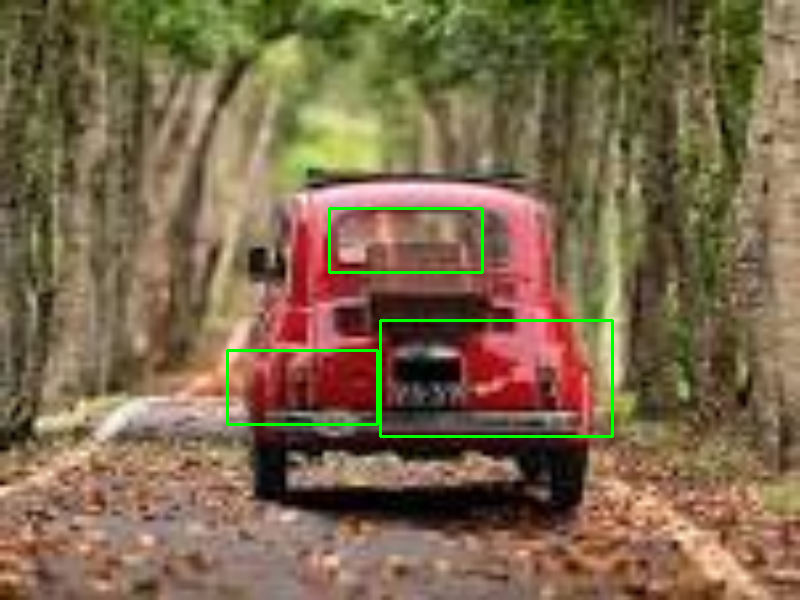

Processing image_1.jpg:


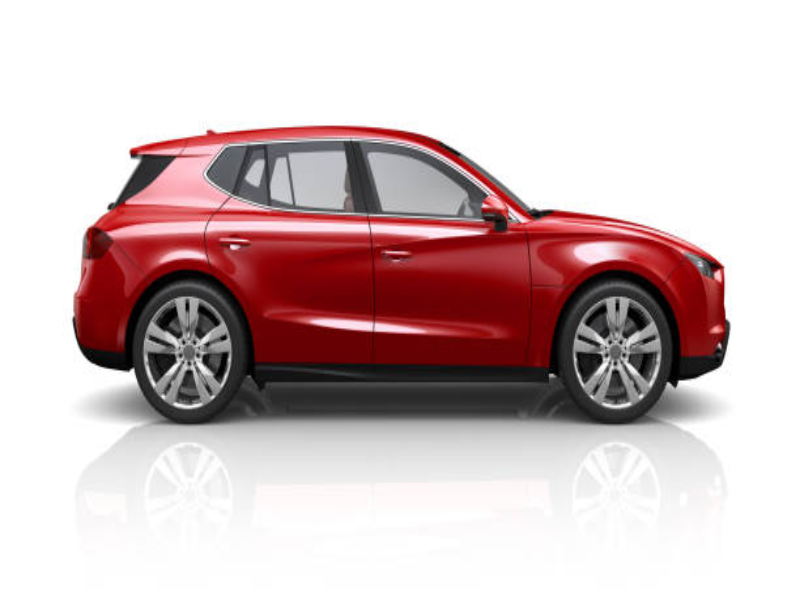

Total number of cars detected: 6


In [ ]:
image_directory = "image"
target_width = 800
target_height = 600
process_images(image_directory, detect_cars, target_width, target_height)


Processing 2.jpeg:


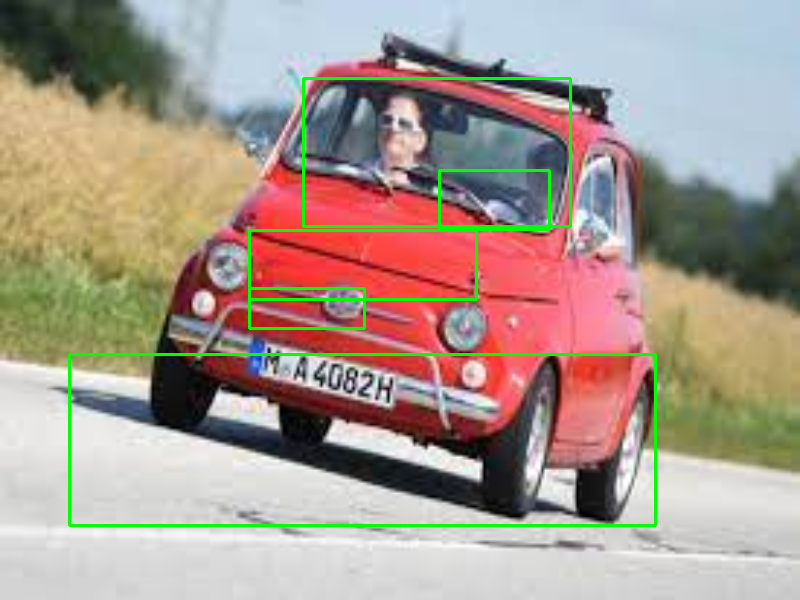

Processing image_2.jpg:


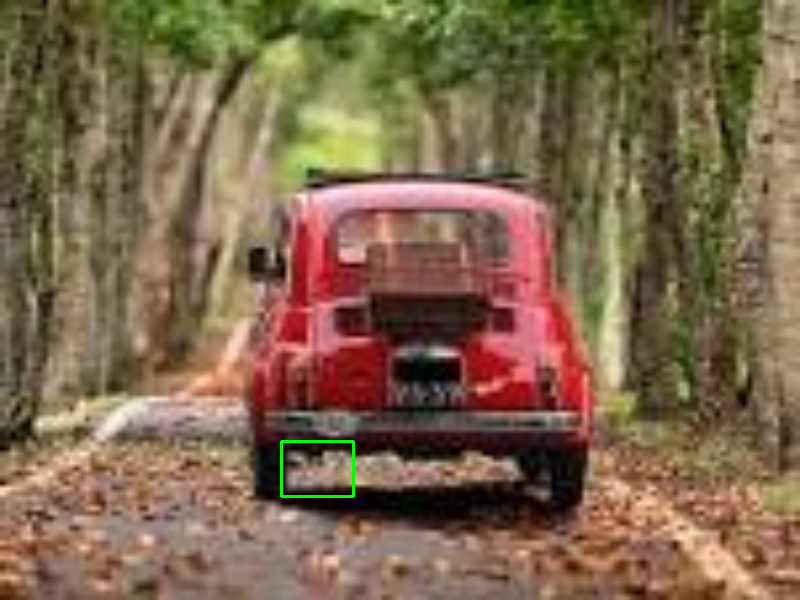

Processing image_1.jpg:


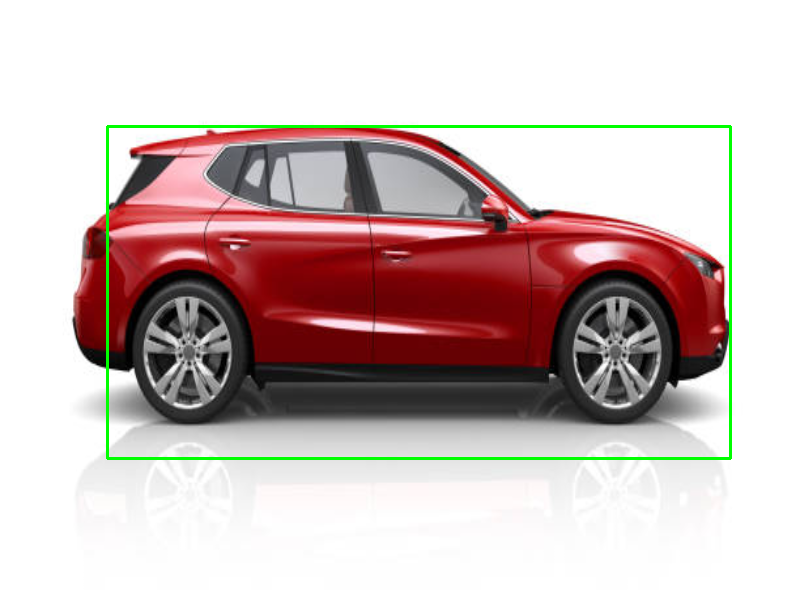

Total number of cars detected: 7


In [144]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from typing import List, Tuple
from skimage import feature


from typing import List, Tuple

def non_max_suppression(boxes: List[Tuple[int, int, int, int]], overlapThresh: float):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # if the bounding boxes are integers, convert them to floats -- this
    # is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    # keep looping while some indexes still remain in the indexes list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the index value
        # to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of the bounding
        # box and the smallest (x, y) coordinates for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have overlap greater
        # than the provided overlap threshold
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))

    # return only the bounding boxes that were picked
    return boxes[pick].astype("int")


def get_file_paths(image_directory, index=None):
    if index is None:
        file_paths = [os.path.join(image_directory, file_name) for file_name in os.listdir(image_directory)]
    else:
        file_name = f"image_{index}.jpg"
        file_path = os.path.join(image_directory, file_name)
        file_paths = [file_path]

    return file_paths

def process_images(image_directory, process_function, target_width, target_height, output_directory, index=None):
    file_paths = get_file_paths(image_directory, index)
    # Initialize total count
    total_car_count = 0
    for file_path in file_paths:
        print(f"Processing {os.path.basename(file_path)}:")
        total_car_count += process_function(file_path, target_width, target_height, output_directory)
    print(f"Total number of cars detected: {total_car_count}")

def detect_cars(image_path, target_width, target_height, output_directory):
    car_count = 0
    bounding_boxes = []

    # Read the image
    image = cv2.imread(image_path)

    # Resize the image to the target width and height
    image = cv2.resize(image, (target_width, target_height))

    # Load the pre-trained cascade classifier for car detection
    cascade_path = "C:\opencv\haarcascades\cars.xml"
    car_cascade = cv2.CascadeClassifier(cascade_path)

    # Convert the image to grayscale
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(grey_image, (3, 3), 0) #parameters to change

    # Apply adaptive thresholding
    binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 2.7)#parameters to change

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours and store bounding boxes around potential cars
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h
        area = cv2.contourArea(contour)

        min_area = 400
        max_area = 8000
        min_aspect_ratio = 1.1 #parameters to change
        max_aspect_ratio = 4.3 #parameters to change

        if min_area < area < max_area and min_aspect_ratio < aspect_ratio < max_aspect_ratio:
            bounding_boxes.append((x, y, x + w, y + h))  # store the bounding box

    # Apply non-max suppression to the bounding boxes
    pick = non_max_suppression(np.array(bounding_boxes), 0.3)#parameters to change

    # Draw the final bounding boxes and count cars
    for (startX, startY, endX, endY) in pick:
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        car_count += 1
    # Write the processed image to the output directory
    output_path = os.path.join(output_directory, os.path.basename(image_path))
    cv2.imwrite(output_path, image)

    # Display the resulting image
    cv2_imshow(image)

    return car_count

image_directory = "image"

# Call the detect_cars function with a specific image (e.g., index 1, 2, 3, ...)
image_directory = "image"
target_width = 800
target_height = 600

# Call the detect_cars function with a specific image (e.g., index 1, 2, 3, ...) and resize the images
output_directory = "/content/drive/MyDrive/processed_images" 
process_images(image_directory, detect_cars, target_width, target_height, output_directory)



In [ ]:
image_directory = "image"
target_width = 800
target_height = 600
process_images(image_directory, detect_cars, target_width, target_height, output_directory)


In [ ]:
# for testing
image_directory = "./sample"  
output_directory = "./processed_images"  
target_width = 400
target_height = 300

# Call the process_images function
process_images(image_directory, detect_cars, target_width, target_height, output_directory)



Output hidden; open in https://colab.research.google.com to view.

**Download testing file**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sample.7z to sample.7z


to use the file it must be listed after running the command

In [ ]:
!ls

adaptive_image	contours_image	image	       photos_file_0
binary_image	grey_image	opening_image  sample.7z
closing_image	gus_image	otsu_image     sample_data


In [ ]:
!7z x "sample.7z" -o"/content/"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 82576829 bytes (79 MiB)

Extracting archive: sample.7z
--
Path = sample.7z
Type = 7z
Physical Size = 82576829
Headers Size = 1467
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      3% 1        6% 5 - sample/000004.png                            8% 5 - sample/000004.png                           11% 10 - sample/000009.png                            13% 10 - sample/000009.png                            16% 15 - sample/000014.png                           

# New Section

NEXT ⁉


TO FIX : 
  1. in gussen blurre it take only one image from a dirctory 